In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.utils import Sequence
import math
import cv2
import os 

In [41]:
train_data_dir = r"C:\Users\indian\Desktop\Dataset\train"
categories = ["category 1","category 2","category 3","category 4"]
images = []
labels = []
IMG_SIZE = 50

training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(train_data_dir,category)
        class_num = categories.index(category)
        labels.append(class_num)
        for img in os.listdir(path): 
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            images.append(new_array)  
            training_data.append([new_array, class_num])
create_training_data()
print("training_data = ",len(training_data))
print("images",len(images))
print("labels",len(labels))


training_data =  440
images 440
labels 4


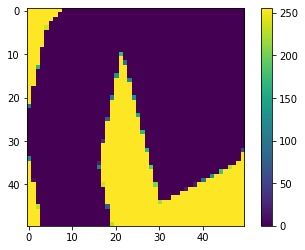

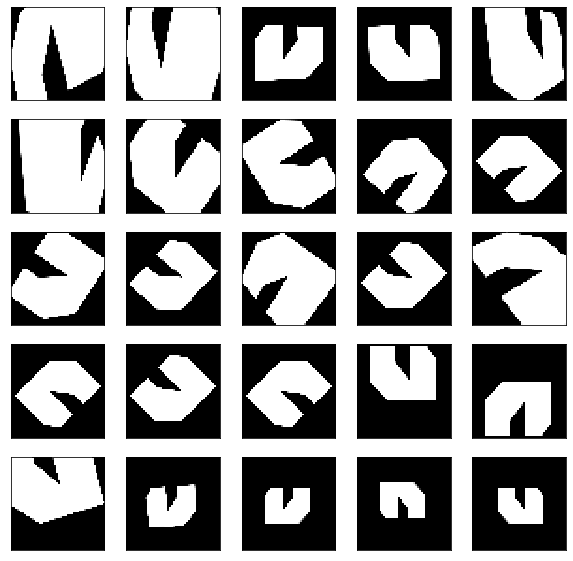

In [42]:
train_images = images
train_labels = labels

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_num[train_labels[i]])
plt.show()

In [43]:
import random

random.shuffle(training_data)
X = []
y = []

for images,label in training_data:
    X.append(images)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [44]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=50, epochs=3)

Epoch 1/3
440/440 [==============================] - 15s 34ms/sample - loss: -68778.3094 - acc: 0.2455
Epoch 2/3
440/440 [==============================] - 16s 36ms/sample - loss: -1041218.3864 - acc: 0.2432
Epoch 3/3
440/440 [==============================] - 15s 34ms/sample - loss: -6664500.6193 - acc: 0.2432
